In [1]:
import sampleClient
import realsense_sensor as sensor
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass

/home/ralfi/git/cv_pipeline


In [2]:
cam = sensor.RealsenseSensor("cfg/sensors/realsense_config.json")
cam.start()

2019-09-13 16:11:25.036 | INFO     | realsense_sensor:__init__:54 - Cam <pyrealsense2.device: Intel RealSense D435 (S/N: 920312072864)> connected.
2019-09-13 16:11:27.497 | INFO     | realsense_sensor:start:98 - Realsense stream started.
2019-09-13 16:11:27.498 | INFO     | realsense_sensor:start:99 - Advanced mode is True


In [17]:
img, d = cam.frames()

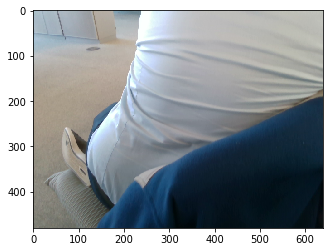

In [18]:
plt.imshow(img)

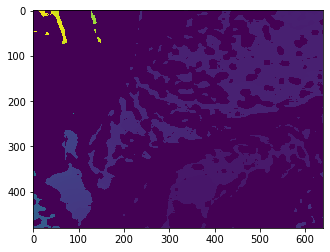

In [19]:
plt.imshow(d)

In [20]:
intrinsics = {
    "cx": cam._intrinsics.ppx,
    "cy": cam._intrinsics.ppy,
    "fx": cam._intrinsics.fx,
    "fy": cam._intrinsics.fy
}
print(intrinsics)

{'cx': 322.7691650390625, 'cy': 240.68063354492188, 'fx': 610.6307373046875, 'fy': 610.991455078125}


In [21]:
print('Shape of the depth image: ', np.shape(d))

Shape of the depth image:  (480, 640)


In [22]:
print('Shape of the color image: ', np.shape(img))

Shape of the color image:  (480, 640, 3)


In [23]:
segmask = sampleClient.predictMask(d, **intrinsics, host='http://localhost:5000')

In [24]:
print(segmask)

{'class_ids': array([1., 1., 1., 1., 1.], dtype=float32), 'masks': array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 

In [25]:
sampleClient.predictRgb(img, **intrinsics, host='http://10.8.225.8:5000')

{'class_ids': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32),
 'masks': array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],

In [ ]:
grasp = sampleClient.predictGQCNN_pj(img, d, **intrinsics, host='http://10.8.225.8:5000')

In [ ]:
sampleClient.predictGQCNN_suction(img, d, **intrinsics, host='http://10.8.225.8:5000')

In [27]:
sampleClient.predictFCGQCNN_pj(img, d, segmask['masks'][0], **intrinsics, host='http://localhost:5000')

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [28]:
sampleClient.predictFCGQCNN_suction(img, d, segmask['masks'][0], **intrinsics, host='http://localhost:5000')

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [3]:
#####

cam.stop()

True

In [ ]:
def plotPjGrasp(img, grasp):
    xs = []; ys=[]
    x1 = grasp["x"]
    y1= grasp["y"]
    xs.append(grasp["x"])
    ys.append(grasp["y"])
    x2 = x1 + 50
    x3 = x1 - 50
    m = np.tan(grasp["angle"])
    y2 = m * 50 + y1
    y3 = m * -50 + y1
    xs.append(x2)
    ys.append(y2)
    xs.append(x3)
    ys.append(y3)
    plt.imshow(img)
    plt.scatter([x1], [y1])
    plt.plot(xs, ys) 


In [8]:
def plotScGrasp(img, x, y, color=(255, 0, 0)):
    img2 = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)
    cv2.circle(img2,(int(x),int(y)),2,color,3)
    plt.imshow(img2)

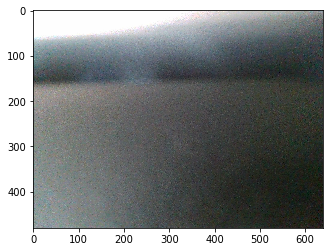

In [9]:
plt.imshow(img)

In [10]:
img_ = img.copy()

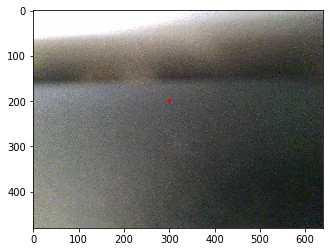

In [11]:
plotScGrasp(img_, 300,200)

In [12]:
plotPjGrasp(img_, grasp)

NameError: name 'grasp' is not defined